In [1]:
%pylab inline

from PyTools import integrated_flux
import os, pres_style

Populating the interactive namespace from numpy and matplotlib


In [34]:
u_obf, g_obf, r_obf, i_obf, z_obf, rs_sam = loadtxt("data/Samples/ugriz_catalog_of.txt", usecols=range(1, 6)+[11], unpack=True)
u_ref, g_ref, r_ref, i_ref, z_ref = loadtxt("data/Samples/ugriz_catalog_rf.txt", usecols=range(1, 6), unpack=True)

knames = loadtxt("data/Samples/ugriz_catalog_of.txt", dtype=str, usecols=(0,))
mnames = loadtxt("data/RealDeal/rd7_master.txt", dtype=str)
snames = loadtxt("data/RealDeal/rd7_sample.txt", dtype=str)

In [35]:
#now remove galaxies not in the actual sample
knames_in_snames = array([name in snames for name in knames], dtype=bool)
mnames_in_snames = array([name in snames for name in mnames], dtype=bool)

print all(knames[knames_in_snames]==snames)
print all(mnames[mnames_in_snames]==snames)

In [38]:
icolor_x = u_obf[knames_in_snames] - g_obf[knames_in_snames]
icolor_y = g_obf[knames_in_snames] - r_obf[knames_in_snames]
kcolor_x = u_ref[knames_in_snames] - g_ref[knames_in_snames]
kcolor_y = g_ref[knames_in_snames] - r_ref[knames_in_snames]
redshift = rs_sam[knames_in_snames]

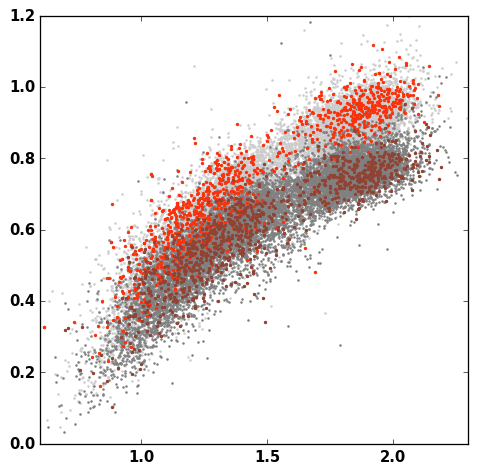

In [39]:
xlm = array((0.6, 2.3))
ylm = array((0.0, 1.2))
axs = subplot(111, xlim=xlm, ylim=ylm)

scatter(icolor_x, icolor_y, lw=0, c="0.8", s=4)
scatter(kcolor_x, kcolor_y, lw=0, c="0.5", s=4)

mask = redshift>=0.09
mask[where(mask)[0][1000:]] = False # take only the first 1000 galaxies

scatter(icolor_x[mask], icolor_y[mask], lw=0, c="#F9320C", s=7)
scatter(kcolor_x[mask], kcolor_y[mask], lw=0, c="#904233", s=7)

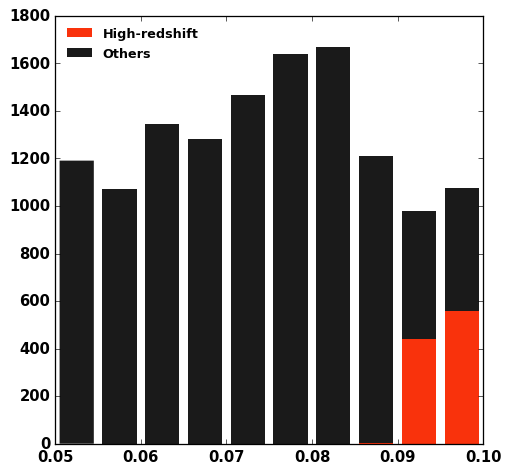

In [46]:
hist([redshift[mask], redshift[~mask]], histtype="barstacked", color=["#F9320C", "0.1"],
     label=["High-redshift", "Others"])
legend(loc=0, fontsize=10)

In [2]:
odir = "../inputs/real_deal7/"

flist = sorted([file for root, subs, files in os.walk(odir+"sdss/") for file in files if file.startswith("processed_SDSS")])

weff = array([3.5618E+03, 4.7189E+03, 6.1852E+03, 7.4997E+03, 8.9615E+03])
sdss_res = loadtxt("../inputs/SDSS_filters.txt")
u_res = sdss_res[:47]
g_res = sdss_res[47:47+89]
r_res = sdss_res[47+89:47+89+75]
i_res = sdss_res[47+89+75:47+89+75+89]
z_res = sdss_res[47+89+75+89:]

In [4]:
sdss, spec = [], []
band = [g_res, r_res, i_res]
for file in flist:
    kflux = loadtxt(odir+"sdss/"+file, usecols=(0,))
    SED = loadtxt(odir+"spec/"+file.replace("SDSS", "SPEC"), usecols=(0, 1))
    sflux = array([integrated_flux(SED[SED[:, 1]>0.0, :], b) for b in band])

    sdss.append(kflux)
    spec.append(sflux)

sdss = array(sdss)
spec = array(spec)